In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 解决matplotlib中文显示以及负号(-)显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv(r'C:\Users\65164\Desktop\202026231_王耀正_covid数据集的可视化分析\1.数据及分析源文件\2020年Covid-19数据.csv')
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020/9/21,0,0,0,0,0,1,No,male,Other
1,2020/4/7,1,0,0,0,1,1,No,male,Other
2,2020/8/26,0,0,0,0,0,1,Yes,female,Contact with confirmed
3,2020/10/14,0,0,0,0,0,1,No,male,Other
4,2020/9/2,0,0,0,0,0,1,No,female,Other


In [4]:
data.shape

(400000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            400000 non-null  object
 1   cough                400000 non-null  int64 
 2   fever                400000 non-null  int64 
 3   sore_throat          400000 non-null  int64 
 4   shortness_of_breath  400000 non-null  int64 
 5   head_ache            400000 non-null  int64 
 6   corona_result        400000 non-null  int64 
 7   age_60_and_above     350088 non-null  object
 8   gender               392248 non-null  object
 9   test_indication      400000 non-null  object
dtypes: int64(6), object(4)
memory usage: 30.5+ MB


In [6]:
data.isnull().sum()#统计每列缺失值得个数

test_date                  0
cough                      0
fever                      0
sore_throat                0
shortness_of_breath        0
head_ache                  0
corona_result              0
age_60_and_above       49912
gender                  7752
test_indication            0
dtype: int64

In [7]:
data['age_60_and_above'] =  data['age_60_and_above'].fillna('unkown')
data['gender'] =  data['gender'].fillna('unkown')
data.isnull().sum()#统计每列缺失值得个数

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [8]:
df = data.corona_result
df

0         1
1         1
2         1
3         1
4         1
         ..
399995    1
399996    0
399997    0
399998    1
399999    1
Name: corona_result, Length: 400000, dtype: int64

In [9]:
data1 = pd.read_csv(r'C:\Users\65164\Desktop\202026231_王耀正_covid数据集的可视化分析\1.数据及分析源文件\yangxing.csv')
data1.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020/9/21,0,0,0,0,0,positive,No,male,Other
1,2020/4/7,1,0,0,0,1,positive,No,male,Other
2,2020/8/26,0,0,0,0,0,positive,Yes,female,Contact with confirmed
3,2020/10/14,0,0,0,0,0,positive,No,male,Other
4,2020/9/2,0,0,0,0,0,positive,No,female,Other


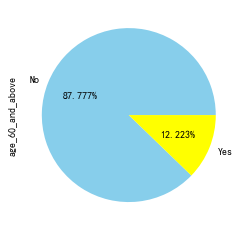

In [10]:
data1['age_60_and_above'].value_counts().plot(kind='pie',colors=['skyblue','yellow','pink'], autopct='%6.3f%%')
plt.show()

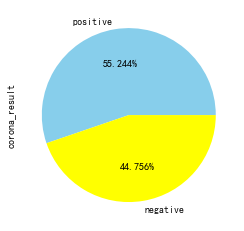

In [11]:
data['corona_result'].value_counts().plot(kind='pie',colors=['skyblue','yellow'], autopct='%6.3f%%')
plt.show()

### 检测结果

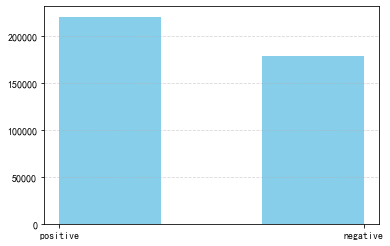

In [12]:
plt.hist(data['corona_result'],color=['skyblue'], bins=3)
plt.grid(linestyle='--', alpha=0.5, axis='y')
plt.show()

In [13]:
dist_columns = {'positive': '0',
                'negative': '1'
               }

data['corona_result'] = data['corona_result'].map(dist_columns)

In [14]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020/9/21,0,0,0,0,0,0,No,male,Other
1,2020/4/7,1,0,0,0,1,0,No,male,Other
2,2020/8/26,0,0,0,0,0,0,Yes,female,Contact with confirmed
3,2020/10/14,0,0,0,0,0,0,No,male,Other
4,2020/9/2,0,0,0,0,0,0,No,female,Other
...,...,...,...,...,...,...,...,...,...,...
399995,2020/7/22,0,0,0,0,0,0,No,male,Contact with confirmed
399996,2020/7/17,0,0,0,0,0,1,No,male,Other
399997,2020/8/28,0,0,0,0,0,1,No,male,Other
399998,2020/10/1,0,0,0,0,0,0,No,female,Other


In [15]:
data_test = data.test_date
data_test

0          2020/9/21
1           2020/4/7
2          2020/8/26
3         2020/10/14
4           2020/9/2
             ...    
399995     2020/7/22
399996     2020/7/17
399997     2020/8/28
399998     2020/10/1
399999      2020/4/6
Name: test_date, Length: 400000, dtype: object

In [16]:
data1.corona_result

0         positive
1         positive
2         positive
3         positive
4         positive
            ...   
220970    positive
220971    positive
220972    positive
220973    positive
220974    positive
Name: corona_result, Length: 220975, dtype: object

In [17]:
count = data1.groupby(['test_date']).count()


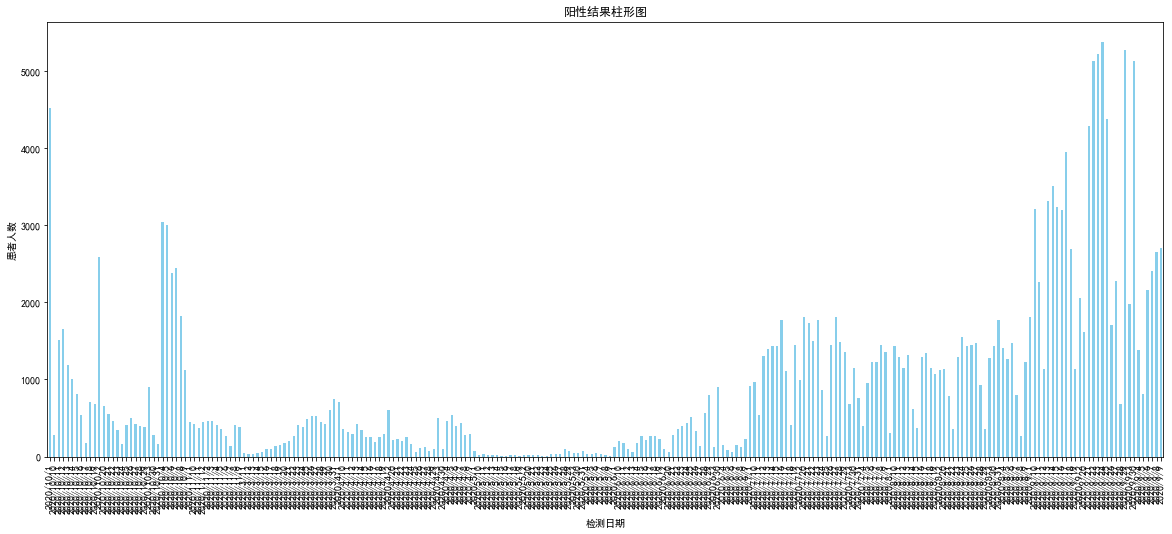

In [18]:
count['corona_result'].plot(kind='bar', figsize=(20, 8),color=['skyblue'])
plt.title("阳性结果柱形图")
plt.xlabel("检测日期")
plt.ylabel("患者人数")
plt.show()


In [19]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020/9/21,0,0,0,0,0,0,No,male,Other
1,2020/4/7,1,0,0,0,1,0,No,male,Other
2,2020/8/26,0,0,0,0,0,0,Yes,female,Contact with confirmed
3,2020/10/14,0,0,0,0,0,0,No,male,Other
4,2020/9/2,0,0,0,0,0,0,No,female,Other
...,...,...,...,...,...,...,...,...,...,...
399995,2020/7/22,0,0,0,0,0,0,No,male,Contact with confirmed
399996,2020/7/17,0,0,0,0,0,1,No,male,Other
399997,2020/8/28,0,0,0,0,0,1,No,male,Other
399998,2020/10/1,0,0,0,0,0,0,No,female,Other


咳嗽和检测结果的关系:
corona_result       0       1
cough                        
0              178466  174105
1               42509    4920


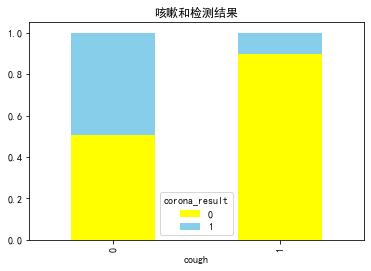

In [20]:
sub_sch = pd.crosstab(data.cough, data.corona_result)
print('咳嗽和检测结果的关系:')
print(sub_sch)
sub_sch.div(sub_sch.sum(1), axis=0).plot(kind='bar',color=['yellow','skyblue'], stacked=True)
plt.title("咳嗽和检测结果")
plt.show()

发烧和检测结果的关系:
corona_result       0       1
fever                        
0              170522  175732
1               50453    3293


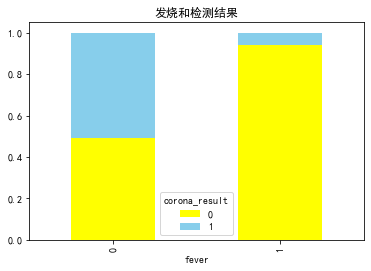

In [21]:
sub_sch = pd.crosstab(data.fever, data.corona_result)
print('发烧和检测结果的关系:')
print(sub_sch)
sub_sch.div(sub_sch.sum(1), axis=0).plot(kind='bar',color=['yellow','skyblue'], stacked=True)
plt.title("发烧和检测结果")
plt.show()

喉咙痛和检测结果的关系:
corona_result       0       1
sore_throat                  
0              200497  178367
1               20478     658


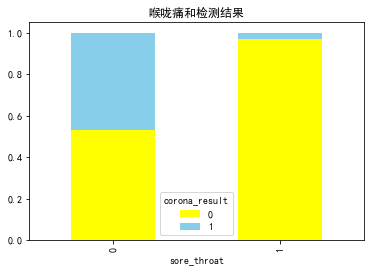

In [22]:
sub_sch = pd.crosstab(data.sore_throat, data.corona_result)
print('喉咙痛和检测结果的关系:')
print(sub_sch)
sub_sch.div(sub_sch.sum(1), axis=0).plot(kind='bar',color=['yellow','skyblue'], stacked=True)
plt.title("喉咙痛和检测结果")
plt.show()

气促和检测结果的关系:
corona_result             0       1
shortness_of_breath                
0                    213517  178767
1                      7458     258


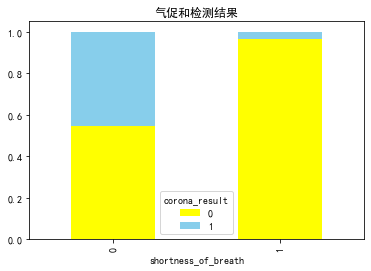

In [23]:
sub_sch = pd.crosstab(data.shortness_of_breath, data.corona_result)
print('气促和检测结果的关系:')
print(sub_sch)
sub_sch.div(sub_sch.sum(1), axis=0).plot(kind='bar',color=['yellow','skyblue'], stacked=True)
plt.title("气促和检测结果")
plt.show()

头痛和检测结果的关系:
corona_result       0       1
head_ache                    
0              179437  177725
1               41538    1300


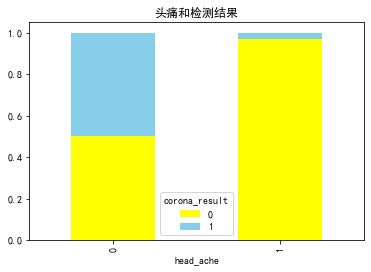

In [24]:
sub_sch = pd.crosstab(data.head_ache, data.corona_result)
print('头痛和检测结果的关系:')
print(sub_sch)
sub_sch.div(sub_sch.sum(1), axis=0).plot(kind='bar',color=['yellow','skyblue'], stacked=True)
plt.title("头痛和检测结果")
plt.show()

测试者状况和检测结果的关系:
corona_result                0       1
test_indication                       
Abroad                    1999    1603
Contact with confirmed   98345    4873
Other                   120631  172549


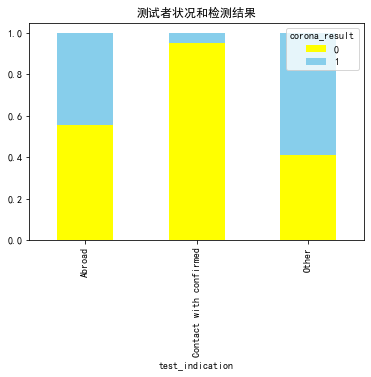

In [25]:
sub_sch = pd.crosstab(data.test_indication, data.corona_result)
print('测试者状况和检测结果的关系:')
print(sub_sch)
sub_sch.div(sub_sch.sum(1), axis=0).plot(kind='bar',color=['yellow','skyblue'], stacked=True)
plt.title("测试者状况和检测结果")
plt.show()

男性女性和检测结果的关系:
corona_result       0      1
gender                      
female         106109  89718
male           113572  82849
unkown           1294   6458


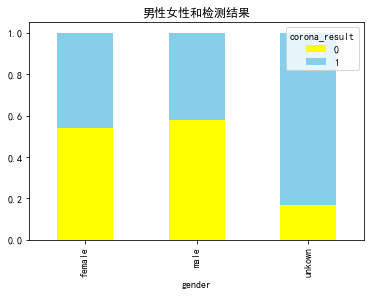

In [26]:
sub_sch = pd.crosstab(data.gender, data.corona_result)
print('男性女性和检测结果的关系:')
print(sub_sch)
sub_sch.div(sub_sch.sum(1), axis=0).plot(kind='bar',color=['yellow','skyblue'], stacked=True)
plt.title("男性女性和检测结果")
plt.show()

### 随机抽取2000条数据

In [134]:
import pandas as pd
data = pd.read_csv(r'C:\Users\65164\Desktop\202026231_王耀正_covid数据集的可视化分析\1.数据及分析源文件/yangxing.csv')

# df.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
# n = number of rows(optional, cannot be used with frac) 抽取的行数；
# frac = fraction/proportion(optional, cannot be used with n) 抽取的比例；
# replace = Allow or disallow sampling of the same row more than once (boolean, default False) 是否为有放回抽样；
# weights (str or ndarray-like, optional) 权重
# random_state (int to use as interval, or call np.random.get_state(), optional) 整数作为间隔，或者调用np.random.get_state()
# axis = extract row or column (0->row, 1->column) 抽取行还是列（0是行，1是列）

# random select 10% from dataset
sample = data.sample(frac=0.01, random_state=5, axis=0)
# export to csv file
sample.to_csv(r'C:\Users\65164\Desktop\202026231_王耀正_covid数据集的可视化分析\1.数据及分析源文件\kfjy.csv',encoding='utf_8_sig')
bb= pd.read_csv(r'C:\Users\65164\Desktop\202026231_王耀正_covid数据集的可视化分析\1.数据及分析源文件\kfjy.csv')
bb

,Unnamed: 0,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,22331,2020/10/28,0,0,0,0,1,positive,No,female,Contact with confirmed
1,200650,2020/7/30,1,0,1,1,1,positive,No,female,Contact with confirmed
2,195160,2020/9/26,0,0,0,0,0,positive,No,female,Other
3,13198,2020/9/5,0,0,0,0,0,positive,No,male,Other
4,174707,2020/9/6,0,1,0,0,0,positive,No,female,Other
...,...,...,...,...,...,...,...,...,...,...,...
2205,118430,2020/11/9,1,1,0,0,0,positive,No,male,Other
2206,167776,2020/10/2,0,0,0,0,0,positive,No,male,Contact with confirmed
2207,16160,2020/9/24,0,0,0,0,0,positive,No,female,Other
2208,182699,2020/9/25,0,0,0,0,0,positive,No,female,Other


## 卡方检验
   ### 出现症状得病
   ### 出现症状不得病

### 假设检验

## 咳嗽检验

In [135]:
cough_negative = len(bb[bb['cough'] == 1])#检测结果为阴性
cough_positive = len(bb[bb['cough'] == 0])#检测结果为阳性

In [136]:
observed = pd.DataFrame({'cough': {'negative': cough_negative, 'positive':cough_positive}})
observed

,cough
negative,422
positive,1788


In [137]:
negative = cough_negative
positive = cough_positive
rate_of_negative =negative / (negative +positive)
rate_of_negative

0.19095022624434388

In [138]:
expected_negative = len(bb)  * rate_of_negative
expected_positive = len(bb)  * (1 - rate_of_negative)
print(expected_negative)
print(expected_positive)

422.0
1788.0


In [139]:
import scipy.stats as stats
#观测值
observed_frequencies = [cough_positive,cough_negative]
#期望值
expected_frequencies = [expected_positive, expected_negative]
#卡方检验
stats.chisquare(f_obs = observed_frequencies,
                f_exp = expected_frequencies)
#    kf = chi2_contingency(observed_frequencies)
#print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

Power_divergenceResult(statistic=0.0, pvalue=1.0)

## 发烧检验

In [140]:
fever_negative = len(bb[bb['fever'] == 1])#检测结果为阴性
fever_positive = len(bb[bb['fever'] == 0])#检测结果为阳性

In [141]:
observed = pd.DataFrame({'fever': {'negative': fever_negative, 'positive':fever_positive}})
observed

,fever
negative,517
positive,1693


In [142]:
negative = fever_negative
positive =fever_positive
rate_of_negative =negative / (negative +positive)
rate_of_negative

0.2339366515837104

In [143]:
expected_negative = len(bb)  * rate_of_negative
expected_positive = len(bb)  * (1 - rate_of_negative)

print(expected_negative)
print(expected_positive)

517.0
1692.9999999999998


In [144]:
import scipy.stats as stats
#观测值
observed_frequencies = [fever_positive,fever_negative]
#期望值
expected_frequencies = [expected_positive, expected_negative]
#卡方检验
stats.chisquare(f_obs = observed_frequencies,
                f_exp = expected_frequencies)
#    kf = chi2_contingency(observed_frequencies)
#print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

Power_divergenceResult(statistic=3.0536791662471494e-29, pvalue=0.9999999999999956)

## 喉咙痛检验

In [145]:
sore_throat_negative = len(bb[bb['sore_throat'] == 1])#检测结果为阴性
sore_throat_positive = len(bb[bb['sore_throat'] == 0])#检测结果为阳性

In [146]:
observed = pd.DataFrame({'sore_throat': {'negative': sore_throat_negative, 'positive':sore_throat_positive}})
observed

,sore_throat
negative,213
positive,1997


In [147]:
negative = sore_throat_negative
positive =sore_throat_positive
rate_of_negative =negative / (negative +positive)
rate_of_negative

0.09638009049773756

In [148]:
expected_negative1 = len(bb)  * rate_of_negative
expected_positive1 = len(bb)  * (1 - rate_of_negative)

print(expected_negative1)
print(expected_positive1)

213.0
1997.0


In [149]:
import scipy.stats as stats
#观测值
observed_frequencies1 = [sore_throat_negative,sore_throat_positive]
#期望值
expected_frequencies1 = [expected_positive1, expected_negative1]
#卡方检验
stats.chisquare(f_obs = observed_frequencies1,
                f_exp = expected_frequencies1)
#    kf = chi2_contingency(observed_frequencies)
#print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

Power_divergenceResult(statistic=16535.765526223608, pvalue=0.0)

## 身体状况检验

In [150]:
shortness_of_breath_negative = len(bb[bb['shortness_of_breath'] == 1])#检测结果为阴性
shortness_of_breath_positive = len(bb[bb['shortness_of_breath'] == 0])#检测结果为阳性

In [151]:
observed = pd.DataFrame({'shortness_of_breath': {'negative': shortness_of_breath_negative, 'positive':shortness_of_breath_positive}})
observed

,shortness_of_breath
negative,76
positive,2134


In [152]:
negative = shortness_of_breath_negative
positive = shortness_of_breath_positive
rate_of_negative =negative / (negative +positive)
rate_of_negative

0.034389140271493215

In [153]:
expected_negative1 = len(bb)  * rate_of_negative
expected_positive1 = len(bb)  * (1 - rate_of_negative)

print(expected_negative1)
print(expected_positive1)

76.0
2134.0


In [154]:
import scipy.stats as stats
#观测值
observed_frequencies1 = [shortness_of_breath_negative,shortness_of_breath_positive]
#期望值
expected_frequencies1 = [expected_positive1, expected_negative1]
#卡方检验
stats.chisquare(f_obs = observed_frequencies1,
                f_exp = expected_frequencies1)
#    kf = chi2_contingency(observed_frequencies)
#print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

Power_divergenceResult(statistic=57713.1803383811, pvalue=0.0)

## 头痛检验

In [155]:
head_ache_negative = len(bb[bb['head_ache'] == 1])#检测结果为阴性
head_ache_positive = len(bb[bb['head_ache'] == 0])#检测结果为阳性

In [156]:
observed = pd.DataFrame({'head_ache': {'negative': head_ache_negative, 'positive':head_ache_positive}})
observed

,head_ache
negative,416
positive,1794


In [157]:
negative = head_ache_negative
positive = head_ache_positive
rate_of_negative =negative / (negative +positive)
rate_of_negative

0.18823529411764706

In [158]:
expected_negative1 = len(bb)  * rate_of_negative
expected_positive1 = len(bb)  * (1 - rate_of_negative)

print(expected_negative1)
print(expected_positive1)

416.0
1794.0


In [159]:
import scipy.stats as stats
#观测值
observed_frequencies1 = [head_ache_negative,head_ache_positive]
#期望值
expected_frequencies1 = [expected_positive1, expected_negative1]
#卡方检验
stats.chisquare(f_obs = observed_frequencies1,
                f_exp = expected_frequencies1)
#    kf = chi2_contingency(observed_frequencies)
#print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

Power_divergenceResult(statistic=5623.088768115942, pvalue=0.0)

### 逻辑回归

In [69]:
data = pd.read_csv(r'C:\Users\65164\Desktop\202026231_王耀正_covid数据集的可视化分析\1.数据及分析源文件\2020年Covid-19数据 2.csv')
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,1,No,male,Other
1,1,0,0,0,1,1,No,male,Other
2,0,0,0,0,0,1,Yes,female,Contact with confirmed
3,0,0,0,0,0,1,No,male,Other
4,0,0,0,0,0,1,No,female,Other


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   cough                400000 non-null  int64 
 1   fever                400000 non-null  int64 
 2   sore_throat          400000 non-null  int64 
 3   shortness_of_breath  400000 non-null  int64 
 4   head_ache            400000 non-null  int64 
 5   corona_result        400000 non-null  int64 
 6   age_60_and_above     350088 non-null  object
 7   gender               392248 non-null  object
 8   test_indication      400000 non-null  object
dtypes: int64(6), object(3)
memory usage: 27.5+ MB


60


,miss_num,miss_rate
age_60_and_above,49912,12.478
gender,7752,1.938
cough,0,0.000
fever,0,0.000
sore_throat,0,0.000
shortness_of_breath,0,0.000
head_ache,0,0.000
corona_result,0,0.000
test_indication,0,0.000


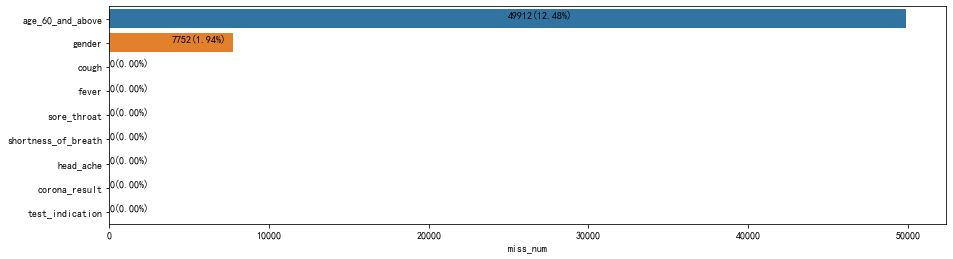

In [71]:
print(pd.get_option("max_rows"))
# 如果需要显示完整，可以设置最多显示的行数。
# pd.set_option("max_rows", 200)
miss = data.isnull().sum(axis=0)
miss = pd.concat([miss, miss * 100 / data.shape[0]], axis=1)
miss.columns = ["miss_num", "miss_rate"]
miss.sort_values("miss_num", inplace=True, ascending=False)
display(miss)
ax = sns.barplot(y=miss.index, x=miss["miss_num"])
figsize=(15, miss.shape[0] // 2)
ax.get_figure().set_size_inches(figsize)
for i in range(miss.shape[0]):
    num = miss["miss_num"].iloc[i]
    rate = miss["miss_rate"].iloc[i]
    ax.text(num / 2, i, f"{num}({rate:.2f}%)")




### 数据缺失比率在20%以内---直接填补

In [72]:
missing_less = miss[(miss["miss_rate"] > 0) & (miss["miss_rate"] <= 20)].index
print("缺失值较少的特征：")
print(missing_less)

缺失值较少的特征：
Index(['age_60_and_above', 'gender'], dtype='object')


In [73]:
 data.dropna(inplace=True)
#缺失值处理完成后，我们再次来进行检查。
(data.isnull().sum() > 0).any()

False

In [74]:
data.duplicated().sum()
#data.drop_duplicates(inplace=True)

348471

### 数据转换与特征工程

In [75]:
import numpy as np

In [76]:
not_number = []
for k, v in data.dtypes.items():
    if not np.issubdtype(v, np.number):
         not_number.append(k)
print("非数值变量：")
print(not_number)

非数值变量：
['age_60_and_above', 'gender', 'test_indication']


In [77]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

#### 2、转换与提取特征

#### ['test_date', 'corona_result', 'age_60_and_above', 'gender', 'test_indication']

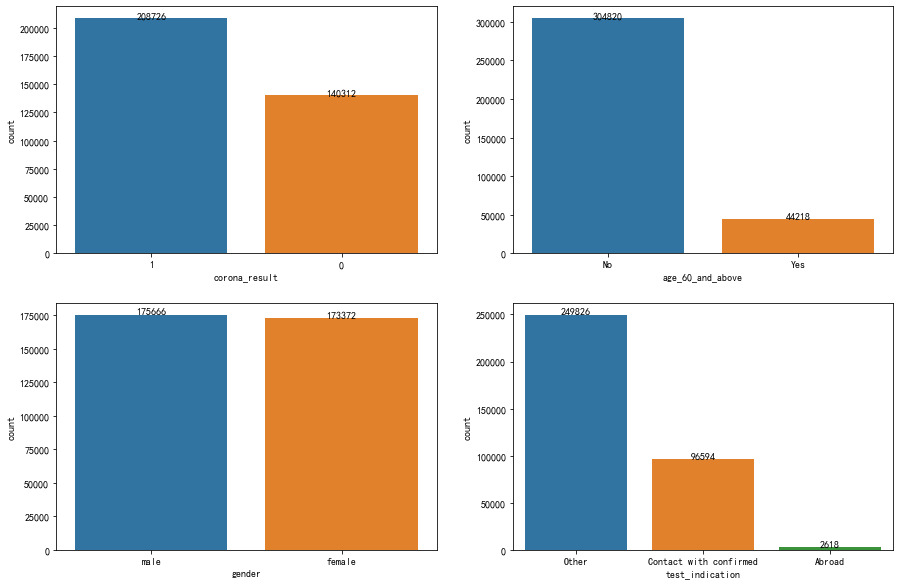

In [78]:
def plot_var(name_list):
    """绘制变量的每个类别的数量。
    Parameters
    ----------
    name : str
    变量的名称。
    """
    num = len(name_list)
    row, col = np.ceil(num / 2).astype(np.int32), 2
    fig, ax = plt.subplots(row, col)
    fig.set_size_inches(15, row * 5)
    ax = ax.ravel()
    for index, name in enumerate(name_list):
        v = data[name].value_counts()
        sns.countplot(x=name, data=data, order=v.index, ax=ax[index])
        # 在图像上绘制数值。
        for x, y in enumerate(v):
            t = ax[index].text(x, y, y)
            # 数值居中对齐。
            t.set_ha("center")
        if len(v) > 10:
            ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=90)
            
plot_var(["corona_result", "age_60_and_above", "gender", "test_indication"])

In [79]:
columns = [ "age_60_and_above", "gender", "test_indication"]
dummy = pd.get_dummies(data[columns])
display(dummy.head())
data = pd.concat([data, dummy], axis=1)
data = data.drop(columns, axis=1)

,age_60_and_above_No,age_60_and_above_Yes,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,1,0,0,1,0,0,1
1,1,0,0,1,0,0,1
2,0,1,1,0,0,1,0
3,1,0,0,1,0,0,1
4,1,0,1,0,0,0,1


In [80]:
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above_No,age_60_and_above_Yes,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,0,0,0,0,0,1,1,0,0,1,0,0,1
1,1,0,0,0,1,1,1,0,0,1,0,0,1
2,0,0,0,0,0,1,0,1,1,0,0,1,0
3,0,0,0,0,0,1,1,0,0,1,0,0,1
4,0,0,0,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,0,0,0,0,1,1,0,0,1,0,1,0
399996,0,0,0,0,0,0,1,0,0,1,0,0,1
399997,0,0,0,0,0,0,1,0,0,1,0,0,1
399998,0,0,0,0,0,1,1,0,1,0,0,0,1


In [81]:
data['corona_result'].value_counts()

1    208726
0    140312
Name: corona_result, dtype: int64

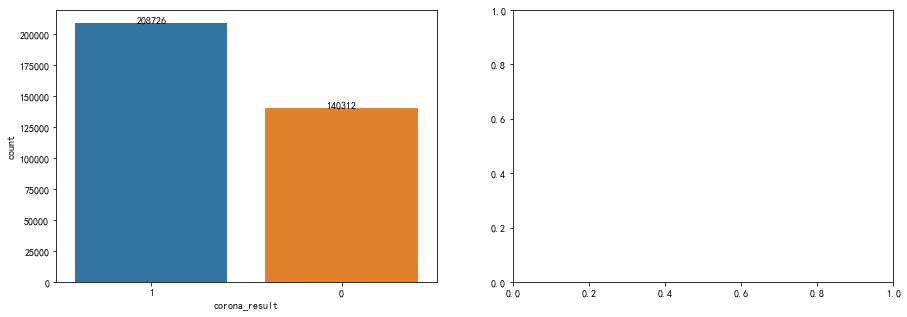

In [82]:
plot_var(["corona_result"])

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression(solver="liblinear")
y = data["corona_result"]
X = data.drop("corona_result", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print("真实值：", y_test.values[:10])
print("预测值：", y_hat[:10])

真实值： [1 1 1 0 1 0 1 0 1 0]
预测值： [1 0 0 0 1 0 0 0 1 0]


In [28]:
from sklearn.metrics import confusion_matrix
# 根据传入的真实值与预测值，创建混淆矩阵。
matrix = confusion_matrix(y_true=y_test, y_pred=y_hat)
print(matrix)

[[40029  2159]
 [21886 40638]]


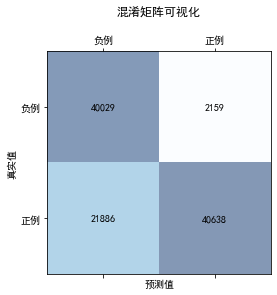

In [29]:
mat = plt.matshow(matrix, cmap=plt.cm.Blues, alpha=0.5)
label = ["负例", "正例"]
# 获取当前的绘图对象。
ax = plt.gca()
# 可以一次性设置多个属性。
ax.set(xticks=np.arange(matrix.shape[1]), yticks=np.arange(matrix.shape[0]), xticklabels=label, yticklabels=label, title="混淆矩阵可视化\n", ylabel="真实值", xlabel="预测值")
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i, s=matrix[i, j], va="center", ha="center")
plt.grid(False)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("正确率：", accuracy_score(y_test, y_hat))
# 默认将1类别视为正例，可以通过pos_label参数指定。
print("精准率：", precision_score(y_test, y_hat))
print("召回率：", recall_score(y_test, y_hat))
print("F1调和平均值：", f1_score(y_test, y_hat))
# 我们也可以调用逻辑回归模型对象的score方法，也能获取正确率。
# 但是需要注意，score方法与正确率（accuracy_score）函数的参数是不同的。
print("score方法计算正确率：", lr.score(X_test, y_test))

正确率： 0.7703701581480633
精准率： 0.9495525387293502
召回率： 0.6499584159682682
F1调和平均值： 0.7716979519753896
score方法计算正确率： 0.7703701581480633


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_hat))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77     42188
           1       0.95      0.65      0.77     62524

    accuracy                           0.77    104712
   macro avg       0.80      0.80      0.77    104712
weighted avg       0.83      0.77      0.77    104712



In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test, y_pred=y_hat)

array([[40029,  2159],
       [21886, 40638]], dtype=int64)

In [33]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

probo = lr.predict_proba(X_test)
# 返回ROC曲线相关值。返回FPR，TPR与阈值。当分值达到阈值时，将样本判定为正类，
# 否则判定为负类。
# y_true：二分类的标签值（真实值）。
# y_score：每个标签（数据）的分值或概率值。当该值达到阈值时，判定为正例，否则判定为负例。
# 在实际模型评估时，该值往往通过决策函数（decision_function）或者概率函数（predict_proba）获得。
# pos_label：指定正例的标签值。
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=probo[:, 1], pos_label=1)
# 对概率降序排列，然后从中选择若干元素作为阈值，每个阈值下，都可以计算一个tpr与fpr，
# 每个tpr与fpr对应ROC曲线上的一个点，将这些点进行连接，就可以绘制ROC曲线。
print(probo.shape, fpr.shape, tpr.shape, thresholds.shape)
print(thresholds[:10])
# auc与roc_auc_score函数都可以返回AUC面积值，但是注意，两个函数的参数是不同的。
print("AUC面积值：", auc(fpr, tpr))
print("AUC面积得分：", roc_auc_score(y_true=y_test, y_score=probo[:, 1]))

(104712, 2) (305,) (305,) (305,)
[1.99999651 0.99999651 0.9999957  0.99999555 0.99999059 0.99999027
 0.99998759 0.99997295 0.99997201 0.99997188]
AUC面积值： 0.8141559722416739
AUC面积得分： 0.8141559722416739


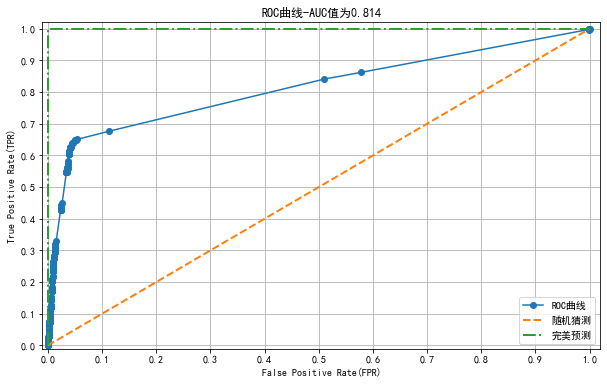

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker="o", label="ROC曲线")
plt.plot([0,1], [0,1], lw=2, ls="--", label="随机猜测")
plt.plot([0, 0, 1], [0, 1, 1], lw=2, ls="-.", label="完美预测")
plt.xlim(-0.01, 1.02)
plt.ylim(-0.01, 1.02)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.grid(True)
plt.title(f"ROC曲线-AUC值为{auc(fpr, tpr):.3f}")
plt.legend()
plt.show()

[0.59710444 0.5970202  0.59701036 0.5968927  0.59686726 0.68854239
 0.70965652 0.89919612 0.94748614 0.94929229 0.94955254 0.95106812
 0.95113037 0.95386887 0.95416946 0.95664993 0.95687398 0.95695397
 0.95702216 0.957019   0.95704244 0.95726789 0.95733412 0.95733098
 0.95732889 0.95732679 0.95732051 0.95731947 0.95795187 0.9579532
 0.95782843 0.95782812 0.95780505 0.95779509 0.95778331 0.95778223
 0.95861615 0.95860092 0.95859219 0.95858572 0.95855047 0.95854507
 0.95803528 0.95796067 0.95865393 0.95872929 0.95872251 0.95872138
 0.9583345  0.95830183 0.95933316 0.95945073 0.95952702 0.95952588
 0.95952361 0.95951565 0.96191877 0.96395738 0.96402903 0.96413133
 0.96399469 0.96395717 0.9639565  0.96395747 0.96395097 0.96394967
 0.9692351  0.9712066  0.97184014 0.97205518 0.97202762 0.97200061
 0.97194215 0.97191355 0.97185285 0.97179886 0.9717974  0.97179594
 0.97179447 0.97178963 0.97174221 0.97173628 0.97173331 0.97172736
 0.97276093 0.97275792 0.97280115 0.97279822 0.97262969 0.97260

Text(0.5, 1.0, 'P-R曲线')

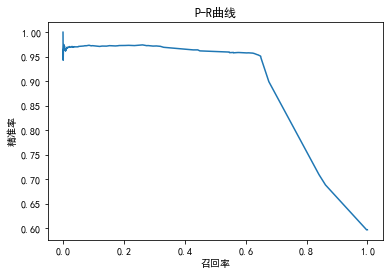

In [35]:
from sklearn.metrics import precision_recall_curve
# 计算在不同阈值下的精准率与召回率。
# y_true：每个样本的真实值。
# probas_pred：每个样本的概率值（或z值）。
# pos_label：指定正例类别。
# 函数会返回3个值：
# precision：每个样本在对应阈值下的精准率，最后一个元素值为1。
# recall：每个样本在对应阈值下的召回率。最后一个元素值为0。
# thresholds：升序排列的阈值数组。【说明：因为阈值是升序排列的，因此，可以推导出
# 精准率升序排列，召回率降序排列。】
precision, recall, thresholds = precision_recall_curve(y_test, probo[:, 1], pos_label=1)
print(precision)
print(recall)
# 阈值会从y_true参数的数组中来选取一部分。注意：阈值的数量比precision与recall少1。
print(precision.shape, recall.shape, thresholds.shape, y_test.shape)
plt.plot(recall, precision)
plt.xlabel("召回率")
plt.ylabel("精准率")
plt.title("P-R曲线")

In [36]:
min_recall = 0.95
# 召回率降序排列，截取的一定是数组中的前半部分。
boundary_index = recall[recall >= min_recall].shape[0]
pre = precision[:boundary_index]
rec = recall[:boundary_index]
thr = thresholds[:boundary_index]
f1 = (2 * pre * rec) / (pre + rec)
index = f1.argmax()
print("最佳阈值：", thr[index])
print("最佳F1值：", f1.max())
print("最佳F1值时的精准率：", pre[index])
print("最佳F1值时的召回率：", rec[index])

最佳阈值： 0.2380820182329124
最佳F1值： 0.747733741538903
最佳F1值时的精准率： 0.5971044388417756
最佳F1值时的召回率： 1.0


Text(0.5, 1.0, 'KS曲线')

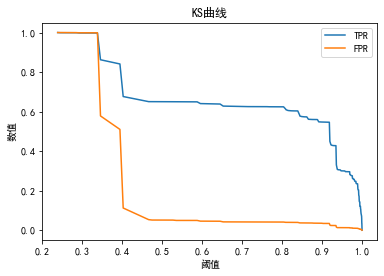

In [37]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=probo[:, 1], pos_label=1)
# roc_curve中，thresholds索引为0的元素值会大于1，为了能够正常显示，
# 将thresholds索引为0的元素修改为1。
thresholds[0] = 1
plt.plot(thresholds, tpr, label="TPR")
plt.plot(thresholds, fpr, label="FPR")
plt.legend()
plt.xlabel("阈值")
plt.ylabel("数值")
plt.title("KS曲线")

In [38]:
diff = tpr - fpr
index = diff.argmax()
print("最大差值位置：", index)
print("对应的阈值：", thresholds[index])

最大差值位置： 292
对应的阈值： 0.5872037554127475


## 随机森林

In [4]:
import pandas as pd
data = pd.read_csv(r'C:\Users\65164\Desktop\202026231_王耀正_covid数据集的可视化分析\1.数据及分析源文件\2020年Covid-19数据 2.csv')

# df.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
# n = number of rows(optional, cannot be used with frac) 抽取的行数；
# frac = fraction/proportion(optional, cannot be used with n) 抽取的比例；
# replace = Allow or disallow sampling of the same row more than once (boolean, default False) 是否为有放回抽样；
# weights (str or ndarray-like, optional) 权重
# random_state (int to use as interval, or call np.random.get_state(), optional) 整数作为间隔，或者调用np.random.get_state()
# axis = extract row or column (0->row, 1->column) 抽取行还是列（0是行，1是列）

# random select 10% from dataset
sample = data.sample(frac=0.1, random_state=5, axis=0)
# export to csv file
sample.to_csv(r'C:\Users\65164\Desktop\202026231_王耀正_covid数据集的可视化分析\1.数据及分析源文件\kfjy.csv',encoding='utf_8_sig')
data= pd.read_csv(r'C:\Users\65164\Desktop\202026231_王耀正_covid数据集的可视化分析\1.数据及分析源文件\kfjy.csv')
data

,Unnamed: 0,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,86101,0,0,0,0,0,0,No,female,Other
1,331256,0,0,0,0,0,1,No,female,Contact with confirmed
2,255572,0,0,0,0,0,1,No,female,Other
3,303651,0,0,0,0,0,0,Yes,female,Other
4,87124,0,0,0,0,0,0,No,female,Other
...,...,...,...,...,...,...,...,...,...,...
39995,115660,0,0,0,0,0,1,Yes,female,Other
39996,140192,0,0,0,0,0,0,No,male,Other
39997,42378,1,1,1,0,1,1,No,female,Contact with confirmed
39998,40836,0,0,0,0,0,1,No,male,Other


In [4]:
data = pd.read_csv(r'C:\Users\65164\Desktop\202026231_王耀正_covid数据集的可视化分析\1.数据及分析源文件\2020年Covid-19数据 2.csv')
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,1,No,male,Other
1,1,0,0,0,1,1,No,male,Other
2,0,0,0,0,0,1,Yes,female,Contact with confirmed
3,0,0,0,0,0,1,No,male,Other
4,0,0,0,0,0,1,No,female,Other


60


,miss_num,miss_rate
age_60_and_above,49912,12.478
gender,7752,1.938
cough,0,0.000
fever,0,0.000
sore_throat,0,0.000
shortness_of_breath,0,0.000
head_ache,0,0.000
corona_result,0,0.000
test_indication,0,0.000


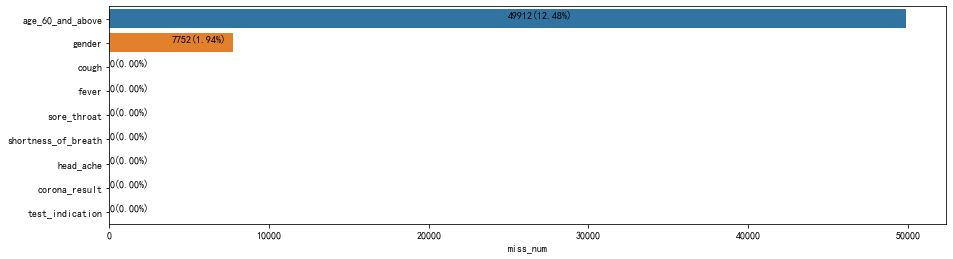

In [5]:
print(pd.get_option("max_rows"))
# 如果需要显示完整，可以设置最多显示的行数。
# pd.set_option("max_rows", 200)
miss = data.isnull().sum(axis=0)
miss = pd.concat([miss, miss * 100 / data.shape[0]], axis=1)
miss.columns = ["miss_num", "miss_rate"]
miss.sort_values("miss_num", inplace=True, ascending=False)
display(miss)
ax = sns.barplot(y=miss.index, x=miss["miss_num"])
figsize=(15, miss.shape[0] // 2)
ax.get_figure().set_size_inches(figsize)
for i in range(miss.shape[0]):
    num = miss["miss_num"].iloc[i]
    rate = miss["miss_rate"].iloc[i]
    ax.text(num / 2, i, f"{num}({rate:.2f}%)")



In [6]:
missing_less = miss[(miss["miss_rate"] > 0) & (miss["miss_rate"] <= 20)].index
print("缺失值较少的特征：")
print(missing_less)

缺失值较少的特征：
Index(['age_60_and_above', 'gender'], dtype='object')


In [7]:
 data.dropna(inplace=True)
#缺失值处理完成后，我们再次来进行检查。
(data.isnull().sum() > 0).any()

False

In [8]:
data.duplicated().sum()
#data.drop_duplicates(inplace=True)

348471

In [9]:
import numpy as np

In [10]:
not_number = []
for k, v in data.dtypes.items():
    if not np.issubdtype(v, np.number):
         not_number.append(k)
print("非数值变量：")
print(not_number)

非数值变量：
['age_60_and_above', 'gender', 'test_indication']


In [11]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

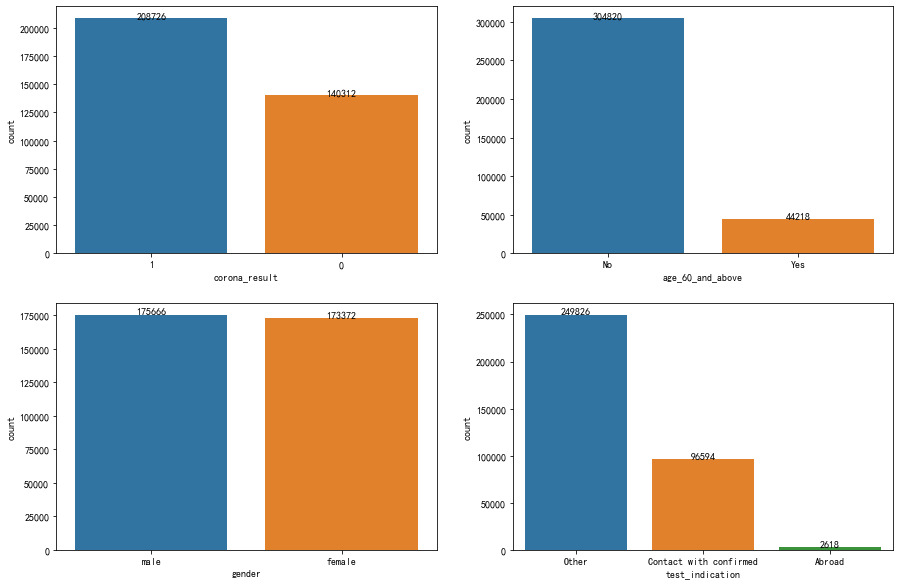

In [12]:
def plot_var(name_list):
    """绘制变量的每个类别的数量。
    Parameters
    ----------
    name : str
    变量的名称。
    """
    num = len(name_list)
    row, col = np.ceil(num / 2).astype(np.int32), 2
    fig, ax = plt.subplots(row, col)
    fig.set_size_inches(15, row * 5)
    ax = ax.ravel()
    for index, name in enumerate(name_list):
        v = data[name].value_counts()
        sns.countplot(x=name, data=data, order=v.index, ax=ax[index])
        # 在图像上绘制数值。
        for x, y in enumerate(v):
            t = ax[index].text(x, y, y)
            # 数值居中对齐。
            t.set_ha("center")
        if len(v) > 10:
            ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=90)
            
plot_var(["corona_result", "age_60_and_above", "gender", "test_indication"])

In [13]:
columns = [ "age_60_and_above", "gender", "test_indication"]
dummy = pd.get_dummies(data[columns])
display(dummy.head())
data = pd.concat([data, dummy], axis=1)
data = data.drop(columns, axis=1)

,age_60_and_above_No,age_60_and_above_Yes,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,1,0,0,1,0,0,1
1,1,0,0,1,0,0,1
2,0,1,1,0,0,1,0
3,1,0,0,1,0,0,1
4,1,0,1,0,0,0,1


In [25]:
data['corona_result'].value_counts()

1    208726
0    140312
Name: corona_result, dtype: int64

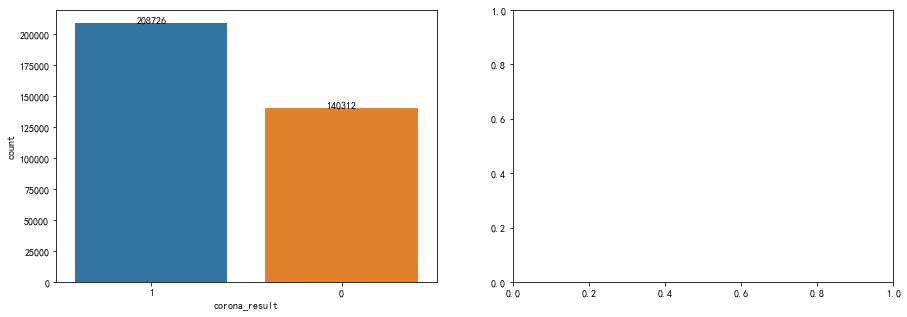

In [26]:
plot_var(["corona_result"])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

lr = LogisticRegression(solver="liblinear")
y = data["corona_result"]
X = data.drop("corona_result", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)
print("真实值：", y_test.values[:10])
print("预测值：", y_hat[:10])

真实值： [1 1 1 0 1 0 1 0 1 0]
预测值： [1 0 0 0 1 0 0 0 1 0]


In [28]:
from sklearn.metrics import confusion_matrix
# 根据传入的真实值与预测值，创建混淆矩阵。
matrix = confusion_matrix(y_true=y_test, y_pred=y_hat)
print(matrix)

[[40029  2159]
 [21886 40638]]


In [29]:
data['corona_result'].value_counts()

1    208726
0    140312
Name: corona_result, dtype: int64

In [30]:
y_full=data['corona_result']

In [31]:
y_full.value_counts()

1    208726
0    140312
Name: corona_result, dtype: int64

In [32]:
X_full = data.loc[:,data.columns!='corona_result']
X_full

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above_No,age_60_and_above_Yes,gender_female,gender_male,test_indication_Abroad,test_indication_Contact with confirmed,test_indication_Other
0,0,0,0,0,0,1,0,0,1,0,0,1
1,1,0,0,0,1,1,0,0,1,0,0,1
2,0,0,0,0,0,0,1,1,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,0,1
4,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,0,0,0,0,0,1,0,0,1,0,1,0
399996,0,0,0,0,0,1,0,0,1,0,0,1
399997,0,0,0,0,0,1,0,0,1,0,0,1
399998,0,0,0,0,0,1,0,1,0,0,0,1


<AxesSubplot:>

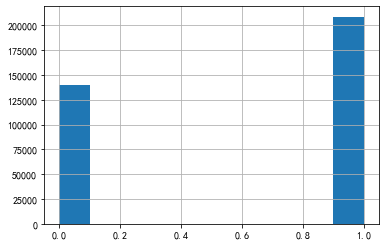

In [33]:
y_full.hist()

In [34]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=100) 
rfc = RandomForestClassifier(n_estimators=100,random_state=0) 

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_vali, Y_train, Y_vali = train_test_split(X_full, y_full,test_size=0.3,random_state=420)

0.7713751227546048 31


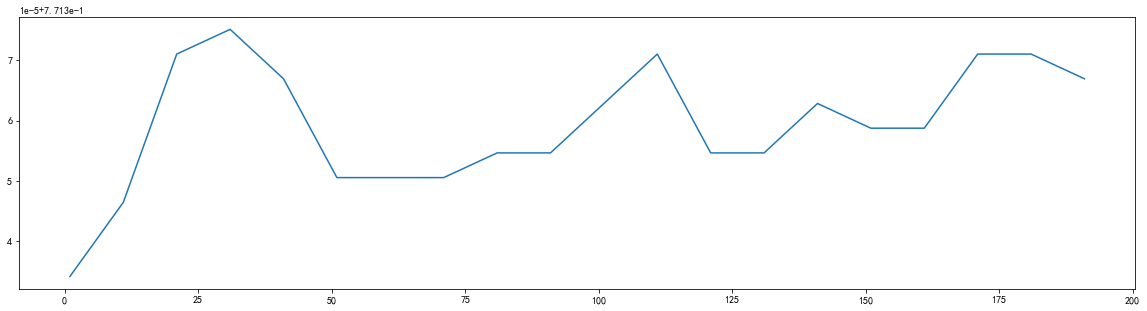

In [36]:
# 调随机森林的参数 n_estimators
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1, random_state=0)
    score = cross_val_score(rfc, X_train, Y_train, cv=10).mean() 
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1) 
plt.figure(figsize=[20 ,5]) 
plt.plot(range(1,201,10),scorel)
plt.show()

0.7713751227546048 31


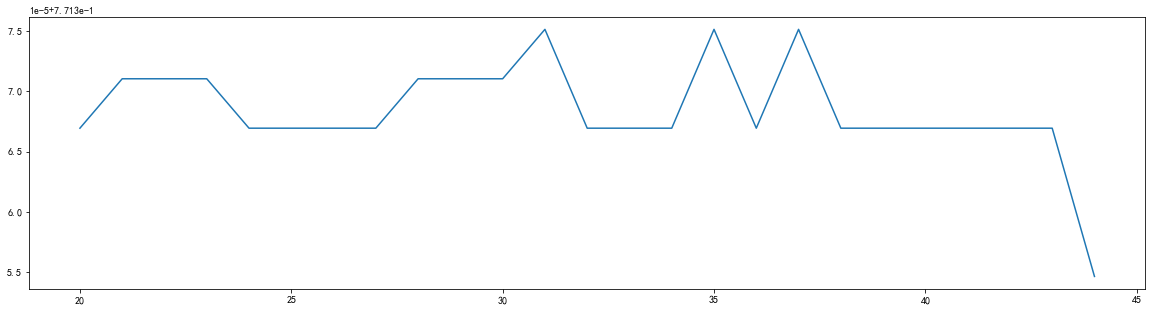

In [43]:
scorel = []
for i in range(20,45):
    rfc = RandomForestClassifier(n_estimators=i,n_jobs=-1, random_state=0)
    score = cross_val_score(rfc, X_train, Y_train,cv=10).mean() 
    scorel.append(score)
print(max(scorel),([*range(20,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(20,45),scorel)
plt.show()

In [50]:
from sklearn.model_selection import GridSearchCV 


In [51]:
param_grid = {'max_depth':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=31,random_state=0) 
GS = GridSearchCV(rfc,param_grid,cv=10) 
GS.fit(X_train, Y_train)
GS.best_params_ #显示调整出来的最佳参数

{'max_depth': 9}

In [40]:
GS.best_score_ #返回调整好的最佳参数对应的准确率

0.7713751222520477

In [52]:
#调整max_features
param_grid = {'max_features':np.arange(5,30,1)} 
rfc = RandomForestClassifier(n_estimators=31,random_state=0,max_depth=11)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(X_train, Y_train)
GS.best_params_

{'max_features': 5}

In [53]:
GS.best_score_

0.7713751227546048

In [54]:
rfc = RandomForestClassifier(n_estimators=113,random_state=0,max_depth=11,max_features=14)
score = cross_val_score(rfc,X_train, Y_train,cv=10).mean()
score

0.7713546581256614

In [55]:
rfc = RandomForestClassifier(n_estimators=113,random_state=0,max_depth=11,max_features=14) 
rfc.fit(X_train, Y_train)
rfc.feature_importances_

array([4.58400997e-02, 2.18061490e-01, 2.34516946e-02, 8.87848994e-03,
       1.15884146e-01, 4.63840318e-04, 5.34227613e-04, 3.25919651e-03,
       3.14074582e-03, 5.64895820e-03, 5.69584734e-01, 5.25237696e-03])

In [56]:
X_train, X_vali, Y_train, Y_vali

(        cough  fever  sore_throat  shortness_of_breath  head_ache  \
 121336      0      0            0                    0          0   
 100422      0      0            0                    0          0   
 186150      0      0            0                    0          0   
 150628      0      0            0                    0          0   
 332487      0      0            0                    0          0   
 ...       ...    ...          ...                  ...        ...   
 204166      0      0            0                    0          0   
 71255       0      0            0                    0          0   
 174408      0      1            0                    0          0   
 136649      0      0            0                    0          0   
 222027      0      0            0                    0          0   
 
         age_60_and_above_No  age_60_and_above_Yes  gender_female  gender_male  \
 121336                    1                     0              1           

In [57]:
 from sklearn import metrics

In [58]:
#预测结果vali_X,vali_y
train_predict = rfc.predict(X_train)
test_predict = rfc.predict(X_vali)


# 计算分别属于各类的概率，取标签为1的概率
train_proba = rfc.predict_proba(X_train)[:, 1]  
test_proba = rfc.predict_proba(X_vali)[:, 1]

<AxesSubplot:>

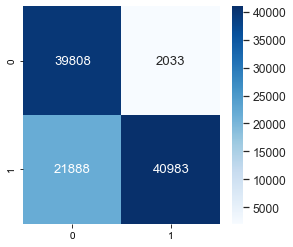

In [59]:
matrix1 = metrics.confusion_matrix(Y_vali, test_predict, labels=[0, 1])
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.set(font_scale=1.1)
sns.heatmap(matrix1, annot=True, fmt='d', cmap=plt.cm.Blues) 

In [60]:
fpr_test, tpr_test, th_test = metrics.roc_curve(Y_vali, test_proba)
fpr_train, tpr_train, th_train = metrics.roc_curve(Y_train, train_proba)
print('AUC = %6.4f' %metrics.auc(fpr_train, tpr_train))

AUC = 0.8182


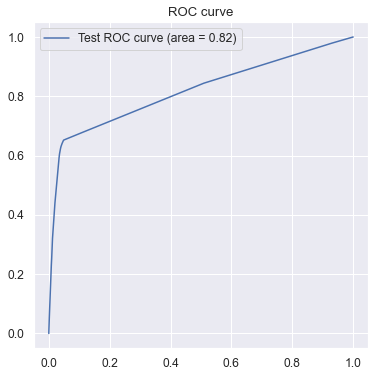

In [61]:
plt.figure(figsize=[6, 6])
test_auc = metrics.auc(fpr_train, tpr_train)
plt.plot(fpr_test, tpr_test, 'b-', label='Test ROC curve (area = %0.2f)' % test_auc)
#plt.plot(fpr_train, tpr_train, 'r-')
plt.title('ROC curve')
plt.legend()
plt.show()

In [62]:
#预测结果vali_X,vali_y
train_predict = rfc.predict(X_train)
test_predict = rfc.predict(X_vali)

<AxesSubplot:>

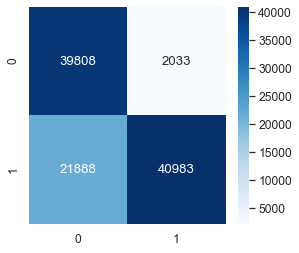

In [63]:
matrix1 = metrics.confusion_matrix(Y_vali, test_predict, labels=[0, 1])
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.set(font_scale=1.1)
sns.heatmap(matrix1, annot=True, fmt='d', cmap=plt.cm.Blues) 

In [64]:
qz= [*zip(X_full.columns,rfc.feature_importances_)]
qz

[('cough', 0.045840099698584456),
 ('fever', 0.21806148972292463),
 ('sore_throat', 0.02345169455398194),
 ('shortness_of_breath', 0.008878489940240614),
 ('head_ache', 0.11588414624039259),
 ('age_60_and_above_No', 0.0004638403183122403),
 ('age_60_and_above_Yes', 0.0005342276125479052),
 ('gender_female', 0.00325919651262951),
 ('gender_male', 0.003140745821506661),
 ('test_indication_Abroad', 0.0056489581951395815),
 ('test_indication_Contact with confirmed', 0.5695847344203211),
 ('test_indication_Other', 0.005252376963418782)]

In [65]:
len(qz)

12

In [66]:
qz_data = pd.DataFrame({'特征':X_full.columns, '权值':rfc.feature_importances_},index=range(len(qz)))
qz_data=qz_data.sort_values(by='权值',ascending=False)
qz_data

,特征,权值
10,test_indication_Contact with confirmed,0.569585
1,fever,0.218061
4,head_ache,0.115884
0,cough,0.045840
2,sore_throat,0.023452
3,shortness_of_breath,0.008878
9,test_indication_Abroad,0.005649
11,test_indication_Other,0.005252
7,gender_female,0.003259
8,gender_male,0.003141


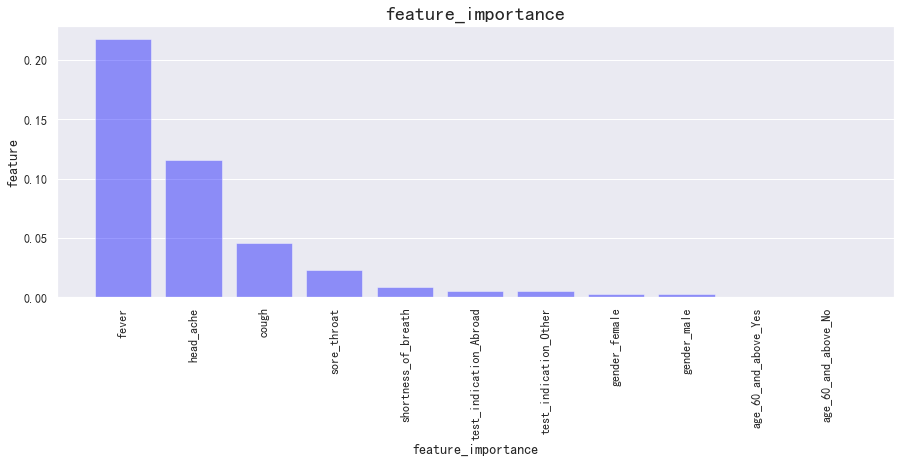

In [67]:
feature_importance1 = qz_data[1:]
feature_importance1 = feature_importance1.reset_index(drop=True)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(15,5))
plt.bar( feature_importance1['特征'], feature_importance1['权值'], alpha=0.4, facecolor = 'blue')
plt.title('feature_importance',fontsize=20)#标题，并设定字号大小
plt.xlabel(u'feature_importance',fontsize=14)#设置x轴，并设定字号大小
plt.ylabel(u'feature',fontsize=14)#设置y轴，并设定字号大小
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()